# **Project Name**    - **TED Talks Views Prediction**



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Member**           - Chandu Chokkam


# **Project Summary -**

Project Summary: TED Talk View Prediction
Objective:
The goal of this project is to develop a predictive model to estimate the number of views a TED Talk will receive based on features extracted from the dataset, such as the talk's topic, duration, description, publication year, and speaker details.

Key Components:

Problem Definition:

Predict the number of views a TED Talk receives.
Identify the key factors contributing to the popularity of a talk.

Dataset:

A publicly available TED Talks dataset containing attributes such as:
Title: Name of the talk.
Speaker name: The person delivering the talk.
Duration: Length of the talk in seconds.
Tags: Keywords associated with the talk.
Number of comments: Engagement metric.
Event: The event where the talk was given.
Publication date: When the talk was made public.
Views: Target variable for prediction.

Exploratory Data Analysis (EDA):

Analyze the distribution of views and other features.
Examine correlations between views and other attributes.
Visualize popular topics, durations, and other key trends.

Feature Engineering:

Extract and process features such as:
Text analysis of title, description, and tags (e.g., sentiment, word count).
Time-based features (e.g., year, month of publication).
Event-based popularity trends.
Encode categorical variables and normalize numerical data.

Model Development:

Split data into training and testing sets.
Use machine learning models such as:
Linear Regression
Random Forest
Gradient Boosting (e.g., XGBoost, LightGBM)
Neural Networks (optional for advanced users).
Evaluate model performance using metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), or R² score.

Insights and Recommendations:

Identify key drivers of high viewership.
Provide actionable insights for TED organizers and speakers to optimize talks for popularity.
Deployment (Optional):

Build a simple web-based interface to input talk details and predict expected views using the trained model.

Potential Applications:

Help speakers understand factors that drive TED Talk popularity.
Assist event organizers in scheduling and promoting talks more effectively.


# **GitHub Link -**

https://github.com/CHOKKAM-CHANDU/TED_TALKS_VIEW_PREDICTION

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Data manipulation libraries
import pandas as pd
import numpy as np

# Data visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Datatime library for Date columns
from datetime import datetime
import datetime as dt

# for remove Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Preprocessing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer

# For build pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
# Machine learning models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.ensemble import VotingRegressor,StackingRegressor


# for plot decision tree
from sklearn import tree

# Model selection libraries
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

# importing XGB regressor
from xgboost import XGBRegressor

# Metrics libraries for model evaluation
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

# Warnings module handles warnings in Python
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Load Dataset
d = pd.read_csv('/content/ted.csv')

### Dataset First View

In [3]:
# Dataset First Look
d.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
d.shape

(4005, 19)

### Variables Description


*   talk_id: A unique identifier for each TED Talk video.
*   title: The title of the talk.
*   speaker_1: The primary speaker for the talk.

*   all_speakers: A list of all the speakers for the talk.

*   occupations: The occupations of the speakers.
*   about_speakers: Information about the speakers, such as their backgrounds and expertise.
*   recorded_date: The date the talk was recorded.


*   published_date: The date the talk was published on the TED Talks YouTube channel.


*   event: The name of the TED event where the talk was given.

*   native_lang: The language the talk was given in.
*   available_lang: The languages the talk is available in.

*   duration: The length of the video.(in sec.)
*   topics: The topics covered in the talk.

*   related talks: Other TED Talks that are related to this talk.
*   url: The URL of the video.

*   description: A brief description of the talk.
*   transcript: A transcript of the talk.



### Dataset Information

In [5]:
# Dataset Info
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
d.duplicated().sum()

0

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
d.isnull().sum()

,0
talk_id,0
title,0
speaker_1,0
all_speakers,4
occupations,522
about_speakers,503
views,0
recorded_date,1
published_date,0
event,0




*   comments , occupations and about_speakers columns are high missing values.
*   The comments attributes has a lot of NaN values(655) to deal with. We have used some basic intution for what could be the reason of comments being null. The most logical explanation could be that the comments are disabled for the video. The other reason that could be possible is the data inconsistency so there could be some issues with the survey that are possibly causing these inconsistencies. We'll deal with these NaN values later on.





In [8]:
# Visualizing the missing values
d['occupations'].duplicated().sum()

1955

In [9]:
# Visualizing the missing values
d['about_speakers'].duplicated().sum()

1027

In [10]:
# Visualizing the missing values
d[d['recorded_date'].isnull()]

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
3831,56629,The unpaid work that GDP ignores -- and why it...,Marilyn Waring,{0: 'Marilyn Waring'},{0: ['economist']},{0: 'Marilyn Waring advocates for a public pol...,1276272,NaN,2020-01-23,TEDxChristchurch,en,"['en', 'es', 'fr', 'it', 'ko', 'pt', 'tr', 'vi...",20.0,1039,"['global development', 'development', 'social ...",{46582: 'Why governments should prioritize wel...,https://www.ted.com/talks/marilyn_waring_the_u...,"If you: do laundry, are (or have been) pregnan...",(In Maori: My mountain is Taupiri.) (Waikato i...


In [11]:
# Visualizing the missing values
d[d['all_speakers'].isnull()]

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
2927,23418,How prefab homes can transform affordable housing,Antón García-Abril,NaN,NaN,NaN,14934,2016-11-19,2018-09-04,TEDxYouth@Beaconstreet,en,"['en', 'es']",NaN,449,"['design', 'architecture', 'industrial design'...","{1015: 'Creative houses from reclaimed stuff',...",https://www.ted.com/talks/anton_garcia_abril_h...,When architect Antón García-Abril moved to Bos...,Subtitle Provided by JUFE MOOC Studio M Subtit...
3266,36384,Why we need to stop obsessing over World War II,Keith Lowe,NaN,NaN,NaN,103682,2014-11-15,2019-03-01,TEDxAthens,en,"['en', 'pt', 'sr']",NaN,1109,"['war', 'history', 'society', 'future', 'globa...","{1999: 'Why veterans miss war', 1651: 'What I ...",https://www.ted.com/talks/keith_lowe_why_we_ne...,Why are we so obsessed with World War II? Hist...,Hello everybody. Audience: Hello. Keith Lowe: ...
3290,36844,Why talent carries you further than fame,Maisie Williams,NaN,NaN,NaN,3677746,2019-02-03,2019-03-11,TEDxManchester,en,"['ar', 'de', 'el', 'en', 'es', 'fr', 'hu', 'pt...",NaN,982,"['art', 'entertainment', 'entrepreneur', 'tech...",{39192: 'Why medieval politics was nothing lik...,https://www.ted.com/talks/maisie_williams_why_...,You'd never know from her transformation into ...,Hi. I'm Maisie Williams. And I'm kind of just ...
3665,49223,Are we living in a simulation?,Zohreh Davoudi,NaN,NaN,NaN,485122,2019-10-08,2019-10-08,TED-Ed,en,"['ar', 'el', 'en', 'es', 'fa', 'fr', 'he', 'id...",NaN,249,"['TED-Ed', 'animation', 'education', 'technolo...","{26263: 'Does time exist?', 24106: 'How do you...",https://www.ted.com/talks/zohreh_davoudi_are_w...,"All life on Earth— living and inanimate, micro...","We live in a vast universe, on a small wet pla..."


### What did you know about your dataset?

The TED Talks dataset contains 4,005 entries with features like title, speaker_1, views, duration, topics, and description. Some fields have missing data, such as occupations (3483 non-null) and comments (3350 non-null). It includes dates (recorded_date, published_date), multilingual data (native_lang, available_lang), and engagement metrics like views and comments. Text fields like description and transcript can be leveraged for NLP tasks.

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
d.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript'],
      dtype='object')

In [13]:
# Dataset Describe
d.describe(include='all')

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
count,4005.000000,4005,4005,4001,3483,3502,4.005000e+03,4004,4005,4005,4005,4005,3350.000000,4005.000000,4005,4005,4005,4005,4005
unique,NaN,4005,3274,3306,2049,2977,NaN,1334,2962,459,12,3902,NaN,NaN,3977,4005,4005,4005,4005
top,NaN,Averting the climate crisis,Alex Gendler,{0: 'Alex Gendler'},{0: ['writer']},{0: 'Alex Rosenthal takes everyday experiences...,NaN,2017-04-24,2017-09-07,TED-Ed,en,['en'],NaN,NaN,"['TED-Ed', 'math']","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
freq,NaN,1,34,34,53,10,NaN,97,27,556,3957,24,NaN,NaN,8,1,1,1,1
mean,12432.538327,NaN,NaN,NaN,NaN,NaN,2.148006e+06,NaN,NaN,NaN,NaN,NaN,161.997015,724.011236,NaN,NaN,NaN,NaN,NaN
std,17447.576262,NaN,NaN,NaN,NaN,NaN,3.451226e+06,NaN,NaN,NaN,NaN,NaN,268.838922,361.775462,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000000,60.000000,NaN,NaN,NaN,NaN,NaN
25%,1252.000000,NaN,NaN,NaN,NaN,NaN,8.820690e+05,NaN,NaN,NaN,NaN,NaN,38.000000,393.000000,NaN,NaN,NaN,NaN,NaN
50%,2333.000000,NaN,NaN,NaN,NaN,NaN,1.375508e+06,NaN,NaN,NaN,NaN,NaN,89.000000,738.000000,NaN,NaN,NaN,NaN,NaN
75%,23777.000000,NaN,NaN,NaN,NaN,NaN,2.133110e+06,NaN,NaN,NaN,NaN,NaN,188.000000,974.000000,NaN,NaN,NaN,NaN,NaN


In [14]:
# describe the numerical dataset
d.describe().T

,count,mean,std,min,25%,50%,75%,max
talk_id,4005.0,1.243254e+04,1.744758e+04,1.0,1252.0,2333.0,23777.0,62794.0
views,4005.0,2.148006e+06,3.451226e+06,0.0,882069.0,1375508.0,2133110.0,65051954.0
comments,3350.0,1.619970e+02,2.688389e+02,0.0,38.0,89.0,188.0,6449.0
duration,4005.0,7.240112e+02,3.617755e+02,60.0,393.0,738.0,974.0,3922.0


In [15]:
d.describe(percentiles=[.25,.50,.75,.80,.85,.90,.95,.96,.97,.98,.99])

,talk_id,views,comments,duration
count,4005.000000,4.005000e+03,3350.000000,4005.000000
mean,12432.538327,2.148006e+06,161.997015,724.011236
std,17447.576262,3.451226e+06,268.838922,361.775462
min,1.000000,0.000000e+00,0.000000,60.000000
25%,1252.000000,8.820690e+05,38.000000,393.000000
50%,2333.000000,1.375508e+06,89.000000,738.000000
75%,23777.000000,2.133110e+06,188.000000,974.000000
80%,24402.600000,2.475286e+06,227.000000,1020.000000
85%,32189.400000,3.019490e+06,275.000000,1072.000000
90%,44241.800000,3.994610e+06,351.100000,1133.000000




*   the minimum value of views is 0.

*   the minimum value of comments is also 0.

*   outliers in views, comments and duration columns.






In [16]:
# find rows where column comments have 0 value
d[d['comments']==0.0]

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
3893,57920,The power of the Afro pick,Jon Gray,{0: 'Jon Gray'},"{0: ['food enthusiast', 'dishwasher']}",{0: 'Culinary evangelist Jon Gray is the voice...,208222,2020-02-04,2020-02-17,Small Thing Big Idea,en,"['ar', 'en', 'es', 'fr', 'tr']",0.0,213,"['design', 'history', 'culture', 'creativity',...",{44259: 'The next big thing is coming from the...,https://www.ted.com/talks/jon_gray_the_power_o...,The Afro pick is much more than a styling tool...,"You don't really look at a toothbrush and say,..."
3898,58706,How surfboards connect us to nature,Yves Béhar,{0: 'Yves Béhar'},{0: ['designer']},"{0: 'Yves Béhar is a designer, entrepreneur an...",181783,2020-02-11,2020-02-18,Small Thing Big Idea,en,"['ar', 'en', 'es', 'fr', 'pt-br', 'tr']",0.0,203,"['oceans', 'design', 'creativity', 'water', 's...","{57920: 'The power of the Afro pick', 57917: '...",https://www.ted.com/talks/yves_behar_how_surfb...,Here's how the surfboard changed our relations...,Riding a wave is like suddenly gaining speed a...


In [17]:
# find rows where column views have 0 value
d[d['views']==0]

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
2813,17850,Por qué necesitamos proteger el alta mar,Enric Sala,{0: 'Enric Sala'},{0: ['marine ecologist']},{0: 'Dr. Enric Sala is a former university pro...,0,2018-04-26,2018-06-06,TED en Español en NYC,es,"['en', 'es']",NaN,772,"['environment', 'economics', 'biosphere', 'nat...","{17733: ""Let's turn the high seas into the wor...",https://www.ted.com/talks/enric_sala_por_que_n...,Estamos pescando más rápido que la capacidad d...,If you randomly jumped in any point of the sea...
3056,29009,Cómo usar el arte de la fotografía para restau...,Alejandro Chaskielberg,{0: 'Alejandro Chaskielberg'},{0: ['photographer']},"{0: 'Alejandro Chaskielberg is a photographer,...",0,2018-11-05,2018-11-29,TEDxRiodelaPlata,es,"['en', 'es', 'pt']",NaN,862,"['art', 'photography', 'community', 'history',...",{2854: 'How your pictures can help reclaim los...,https://www.ted.com/talks/alejandro_chaskielbe...,¿Qué le puede suceder a la memoria cuando la e...,"Recently, my daughter and I decided to give aw..."
3068,29688,Por qué deberíamos comer más bichos,Renata di Tullio,{0: 'Renata di Tullio'},{0: ['técnica agropecuaria y agroalimentaria']},{0: 'Rena es Técnica Agropecuaria y Agroalimen...,0,2018-11-05,2018-12-07,TEDxRiodelaPlata,es,"['en', 'es', 'nl']",NaN,417,"['global issues', 'science', 'insects', 'food'...","{2427: 'The case for fish farming', 1018: 'Why...",https://www.ted.com/talks/renata_di_tullio_por...,"Have you ever considered crickets, houseflies ...",I'm passionate about insects for two reasons. ...
3520,43755,Can dogs sniff out malaria?,James Logan,{0: 'James Logan'},"{0: ['biologist', 'medical entomologist']}",{0: 'Professor James Logan leads an internatio...,0,2019-05-18,2019-06-11,TEDxLondon,en,"['en', 'pt-br', 'ru', 'zh-tw']",NaN,1099,"['health', 'public health', 'animals', 'smell'...",{1819: '3 reasons we still haven’t gotten rid ...,https://www.ted.com/talks/james_logan_can_dogs...,"Each year, hundreds of thousands of people aro...",Malaria is still one of the biggest killers on...
3790,55342,¿Como será el cine del futuro?,Diego Prilusky,{0: 'Diego Prilusky'},{0: ['productor audiovisual']},"{0: 'Diego viene del mundo de la producción, l...",0,2019-10-24,2019-12-19,TEDxRiodelaPlata,es,"['en', 'es', 'it']",NaN,743,"['technology', 'film', 'movies', 'entertainmen...","{1476: 'The shared wonder of film', 403: ""A to...",https://www.ted.com/talks/diego_prilusky_como_...,"Desde las películas western, hasta las cintas ...",The art of movies has existed for more than 10...
4004,62794,The most important anus in the ocean,Cella Wright,{0: 'Cella Wright'},NaN,NaN,0,2020-04-30,2020-04-30,TED-Ed,en,['en'],NaN,281,"['animals', 'TED-Ed', 'animation', 'oceans', '...","{62347: 'The bug that poops candy', 29159: 'In...",https://www.ted.com/talks/cella_wright_the_mos...,Is it a fuzzy sock? An overripe banana? A mold...,Can you guess what you’re looking at? Is it a ...




*   Total 6 rows are present where views = 0 and columns = NaN. this is MCAR data (missing completely at random) so we can remove this rows. because this is impossible that the views of video are 0 on TEDx Website.
*   Total 655 NaN values present in comments column so we have to fill that value also.



### Check Unique Values for each variable.

In [18]:
# Check Unique Values for each variable.
for i in d.columns:
  print(f'The unique values in {i} are {d[i].nunique()}')

The unique values in talk_id are 4005
The unique values in title are 4005
The unique values in speaker_1 are 3274
The unique values in all_speakers are 3306
The unique values in occupations are 2049
The unique values in about_speakers are 2977
The unique values in views are 3996
The unique values in recorded_date are 1334
The unique values in published_date are 2962
The unique values in event are 459
The unique values in native_lang are 12
The unique values in available_lang are 3902
The unique values in comments are 601
The unique values in duration are 1188
The unique values in topics are 3977
The unique values in related_talks are 4005
The unique values in url are 4005
The unique values in description are 4005
The unique values in transcript are 4005


**Numerical Columns =** talk_id, views, comments, duration.

**categorical columns =** title, speaker_1, all_speakers, occupations, about_speakers, event, native_lang, available_lang, topics,
                      related_talks, url, description, transcript

**Datetime columns =** recorded_date, published_date




*   incorrect data-type assigned to recorded_date , published_date , comments.




In [19]:
# Check Unique Values for 'native_lang' variable.
d['native_lang'].unique()

array(['en', 'fr', 'de', 'pt', 'ko', 'zh-cn', 'ar', 'pt-br', 'es', 'ja',
       'it', 'hi'], dtype=object)

In [20]:

d.describe(include='O').T

,count,unique,top,freq
title,4005,4005,Averting the climate crisis,1
speaker_1,4005,3274,Alex Gendler,34
all_speakers,4001,3306,{0: 'Alex Gendler'},34
occupations,3483,2049,{0: ['writer']},53
about_speakers,3502,2977,{0: 'Alex Rosenthal takes everyday experiences...,10
recorded_date,4004,1334,2017-04-24,97
published_date,4005,2962,2017-09-07,27
event,4005,459,TED-Ed,556
native_lang,4005,12,en,3957
available_lang,4005,3902,['en'],24


In [21]:
# Write your code to make your dataset analysis ready.

d[(d['occupations'].isnull() & d['about_speakers'].isnull())][['speaker_1', 'all_speakers']]

,speaker_1,all_speakers
2478,Natalya St. Clair,{0: 'Natalya St. Clair'}
2479,Arleen Sugano,{0: 'Arleen Sugano'}
2480,Patrick Lin,{0: 'Patrick Lin'}
2481,Claudia Aguirre,{0: 'Claudia Aguirre'}
2482,Matthew Winkler,{0: 'Matthew Winkler'}
...,...,...
3986,George Zaidan,{0: 'George Zaidan'}
3992,Ming Luke,{0: 'Ming Luke'}
4001,Stefan C Dombrowski,{0: 'Stefan C Dombrowski'}
4003,Daina Ramey Berry,{0: 'Daina Ramey Berry'}


## 3. ***Data Wrangling***

### Data Wrangling Code

# All Issues with the dataset

1. Dirty Data (Low quality data)

<> Comments , occupations and about_speakers columns are high missing values...we have to fill 655 missing values of comments. completion issue(missing data)

<> Incorrect data-type assigned to recorded_date , published_date , comments.

<> The minimum value of column views is 0 and there are total 6 rows. so we have to delete that rows.

<> The minimum value of comments is also 0. there are only 2 rows there but null value in other 655 rows so simply fill with 0 but this column important so we fill values in feature engineering part. accuracy issue(not accurate values)

<> There are two column with details, i.e. speaker_1, all_speakers. So, one of the column is to be deleted.

<> url and talk_id column is also not useful in views prediction so, we have to delete both the columns.

2. Messy Data (untidy data)

<> Topics and available_lang are in list format. we have to split this untidy data for better feature corr with views. we perform this in feature transformation part.

<> There are also few columns in dictionary untidy format occupations,about_speakers, related_talks but this columns are not important so in later feature transformation part we remove this columns if needed.

In [22]:
# Creating copy of the original dataset
df = d.copy()

In [23]:
# filling missing value.

values = {'comments':0, 'occupations':'no data', 'about_speakers': 'no data', 'all_speakers' : 'no data'}

df = df.fillna(value=values)

In [24]:
# No null values now, I'll take care of views and comment zero values later in feature engineering part.

df.isnull().sum()

,0
talk_id,0
title,0
speaker_1,0
all_speakers,0
occupations,0
about_speakers,0
views,0
recorded_date,1
published_date,0
event,0


In [25]:
#Changing the wrongly assigned data types
df = df.astype({'talk_id': 'int32', 'views':'int32','comments':'int32', 'duration':'int32'})

df['published_date'] = pd.to_datetime(df['published_date'])

df['recorded_date'] = pd.to_datetime(df['recorded_date'])

In [26]:
#Dropping the unnecessary columns & renaming the speaker1 column to speaker column

df.drop(['talk_id', 'all_speakers', 'url'], axis = 1, inplace=True)

df.rename(columns={'speaker_1':'speaker'}, inplace=True)

In [27]:
# Drop rows where 'views' is 0.
# Now df is a new dataframe which does not contain views column with zero value
df = df[df['views'] != 0]

In [28]:
# Cross-Checking the above operation
print((df['views'] == 0).sum())

0


In [29]:
# Removing few more columns which are not important
df.drop(['occupations', 'about_speakers', 'related_talks','description','transcript'], axis=1, inplace=True)

In [30]:
# Checking new shape of dataframe
df.shape

(3999, 11)

In [31]:
#Checking random samples
df.sample(5)

,title,speaker,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics
1235,New ways to see music (with color! and fire!),Jared Ficklin,713003,2012-03-01,2012-07-13,TED2012,en,"['ar', 'bg', 'ca', 'de', 'el', 'en', 'es', 'fa...",53,600,"['creativity', 'music', 'visualizations']"
2645,The gift and power of emotional courage,Susan David,7041506,2017-11-02,2018-01-30,TEDWomen 2017,en,"['ar', 'bg', 'da', 'de', 'el', 'en', 'es', 'fa...",418,1008,"['communication', 'psychology', 'emotions', 'h..."
1048,The quest to understand consciousness,Antonio Damasio,2147410,2011-03-02,2011-12-19,TED2011,en,"['ar', 'bg', 'ca', 'cs', 'de', 'el', 'en', 'es...",382,1122,"['brain', 'consciousness', 'neuroscience', 'sc..."
2122,How a start-up in the White House is changing ...,Haley Van Dyck,1058225,2016-02-16,2016-04-04,TED2016,en,"['ar', 'en', 'es', 'fr', 'he', 'it', 'ja', 'ko...",37,915,"['big problems', 'health care', 'future', 'gov..."
2456,How boredom can lead to your most brilliant ideas,Manoush Zomorodi,3820467,2017-04-24,2017-08-15,TED2017,en,"['ar', 'de', 'el', 'en', 'es', 'fa', 'fr', 'he...",101,973,"['addiction', 'brain', 'cognitive science', 'c..."


In [32]:
# find popular talk show titles and speakers based on views

popular_talks = df[['title', 'speaker', 'views']].sort_values('views', ascending=False)[0:15]
popular_talks

,title,speaker,views
4,Do schools kill creativity?,Sir Ken Robinson,65051954
1296,Your body language may shape who you are,Amy Cuddy,57074270
2062,This is what happens when you reply to spam email,James Veitch,56932551
646,How great leaders inspire action,Simon Sinek,49730580
796,The power of vulnerability,Brené Brown,47544833
1724,How to speak so that people want to listen,Julian Treasure,41504331
2108,Inside the mind of a master procrastinator,Tim Urban,37976820
1366,"Looks aren't everything. Believe me, I'm a model.",Cameron Russell,33874546
2724,My philosophy for a happy life,Sam Berns,33691484
1898,The next outbreak? We're not ready,Bill Gates,33521780


**Observations :**

*   Ken Robinson's talk on Do Schools Kill Creativity? is the most popular TED Talk of all time with 65.05 million views.
*   Also coincidentally, it is also one of the first talks to ever be uploaded on the TED Site (the main dataset is sorted by published date).
*   Robinson's talk is closely followed by Amy Cuddy's talk on Your Body Language May Shape Who You Are.
*   There are only 3 talks that have surpassed the 50 million mark and 12 talks that have crossed the 30 million mark.





In [33]:
# create a dataframe with top 15 speakers by views
top15_views = df.groupby('speaker').views.sum().nlargest(15)
top15_views = top15_views.reset_index()
top15_views


,speaker,views
0,Alex Gendler,117619583
1,Sir Ken Robinson,84380518
2,James Veitch,78843641
3,Simon Sinek,62661183
4,Brené Brown,61285977
5,Bill Gates,57107176
6,Amy Cuddy,57074270
7,Julian Treasure,54799681
8,Hans Rosling,39871561
9,Tim Urban,37976820


In [34]:
# create a dataframe with top 15 speakers by comments
top15_comments = df.groupby('speaker').comments.sum().nlargest(15)
top15_comments = top15_comments.reset_index()
top15_comments

,speaker,comments
0,Richard Dawkins,6982
1,Sir Ken Robinson,6869
2,Sam Harris,3957
3,Hans Rosling,3440
4,David Chalmers,3006
5,Jill Bolte Taylor,2984
6,Brené Brown,2983
7,Lesley Hazleton,2934
8,Bill Gates,2846
9,Amy Cuddy,2633


### What all manipulations have you done and insights you found?

The dataset was first copied to preserve the original data, and missing values were handled by filling `comments` with `0`, and `occupations`, `about_speakers`, and `all_speakers` with `'no data'`. Data types were corrected by converting `talk_id`, `views`, `comments`, and `duration` to `int32`, while `published_date` and `recorded_date` were converted to `datetime`. Unnecessary columns, including `talk_id`, `all_speakers`, `url`, `occupations`, `about_speakers`, `related_talks`, `description`, and `transcript`, were dropped to streamline the dataset. The `speaker_1` column was renamed to `speaker` for clarity. Rows with `views` equal to `0` were removed, and a validation check confirmed that no such rows remained. These manipulations ensured a cleaner and more consistent dataset for further analysis and feature engineering.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

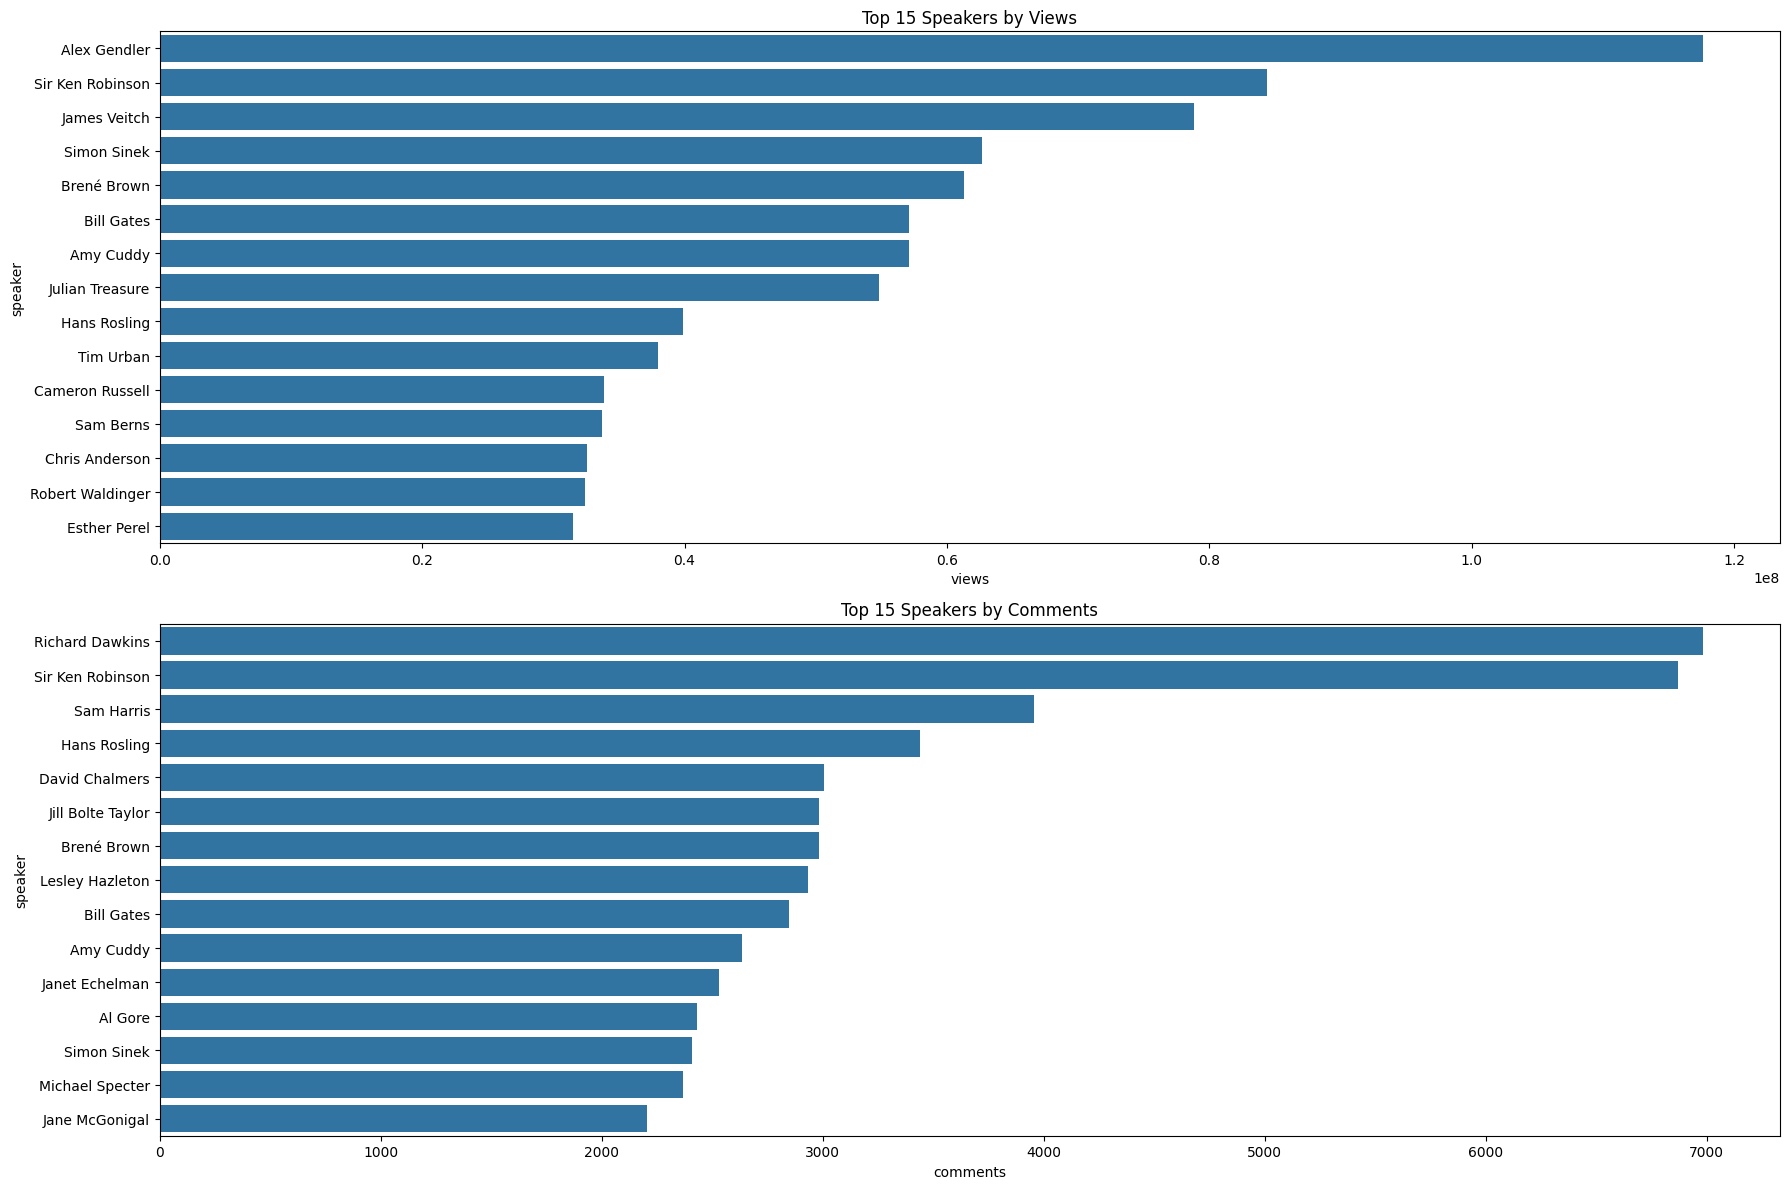

In [36]:
# Chart - 1 visualization code
# create the figure and subplots
fig, axs = plt.subplots(2,1, figsize=(18,12))

# create a barplot with top 15 speakers by views
sns.barplot(x='views', y='speaker', data=top15_views, ax=axs[0])
axs[0].set_title('Top 15 Speakers by Views')

# create a barplot with top 15 speakers by comments
sns.barplot(x='comments', y='speaker', data=top15_comments, ax=axs[1])
axs[1].set_title('Top 15 Speakers by Comments')


plt.tight_layout()
plt.show()

### Questions and Answers:

1. **Why did you pick the specific chart?**  
   The bar plots were chosen because they effectively showcase rankings and comparisons, making it easy to identify the most viewed and commented speakers at a glance.

2. **What is/are the insight(s) found from the chart?**  
   Popular speakers like Alex Gendler and Sir Ken Robinson have high views, while Richard Dawkins and Sir Ken Robinson lead in comments. Themes like education, inspiration, and controversy tend to drive audience engagement.

3. **Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth?**  
   Yes, the insights can guide future content strategies by identifying trending themes and speakers, boosting engagement and revenue. However, over-reliance on popular themes may stifle innovation and lead to audience fatigue. Balancing popular and unique content is essential.

#### Chart - 2

<Axes: xlabel='comments', ylabel='views'>

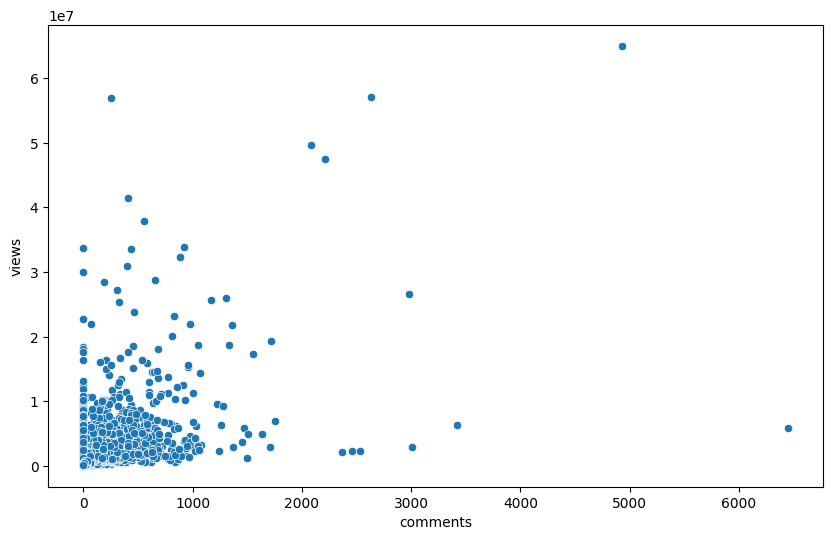

In [37]:
# Chart - 2 visualization code
#checking corr. with views column

plt.figure(figsize=(10,6))
sns.scatterplot(x='comments', y='views', data=df)

### Q&A Based on the Chart

1. **Why did you pick the specific chart?**  
   This scatter plot effectively shows the relationship between the number of views and comments for TED Talks. It allows us to identify patterns, such as whether higher views lead to higher comments or if there are any outliers.

2. **What is/are the insight(s) found from the chart?**  
   - The majority of TED Talks cluster around low views and comments, indicating moderate engagement levels.  
   - Outliers with exceptionally high views or comments highlight specific talks that resonate significantly with the audience.

3. **Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with a specific reason.**  
   - **Positive Impact**: Understanding which talks generate high engagement helps TED focus on popular themes or speakers to maximize audience interaction.  
   - **Negative Impact**: Over-prioritizing popular themes might reduce diversity and innovation, as niche or emerging topics with lower engagement could be overlooked.

#### Chart - 3

<Axes: xlabel='comments', ylabel='Density'>

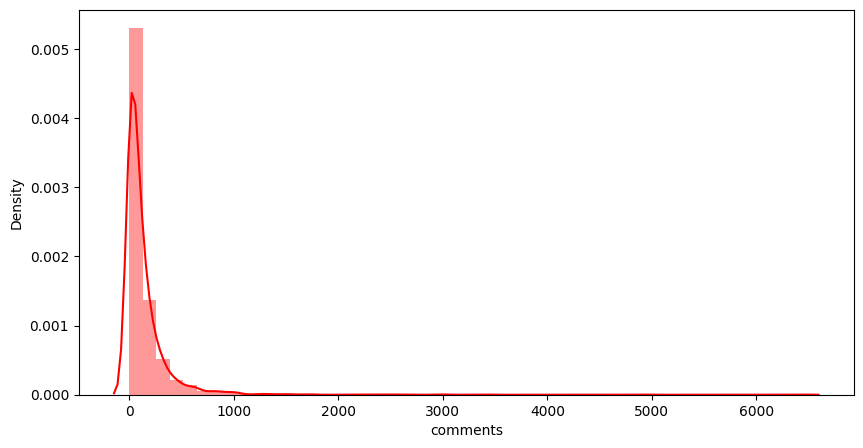

In [38]:
# Chart - 3 visualization code
# checking distribution of comments column

plt.figure(figsize=(10,5))
sns.distplot(df['comments'], color='Red')

### Q&A Based on the Chart

1. **Why did you pick the specific chart?**  
   A density plot with a histogram provides a clear visualization of the distribution of comments. It shows the frequency and concentration of comments for TED Talks, making it easy to observe where most talks lie on the spectrum of engagement.

2. **What is/are the insight(s) found from the chart?**  
   - The majority of TED Talks receive fewer than 500 comments, with a sharp decline as the number of comments increases.  
   - A long tail exists for talks with higher comment counts, indicating a few talks generate significantly more discussion than the rest.

3. **Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with a specific reason.**  
   - **Positive Impact**: Identifying the characteristics of highly commented talks can help TED optimize future content for engagement.  
   - **Negative Impact**: Overfocusing on the majority of low-comment talks might lead to missing opportunities to create more impactful and engaging content.

In [60]:
print(len(df[df['comments'] > 1100]))

0


In [61]:
#Dropping indexes where comments are greater than 1100
df.drop(df[df['comments']>1100].index, inplace=True)

In [62]:
#fill null(0) value with median of column

df['comments']= df['comments'].replace(0, np.nan)
df["comments"].fillna(df["comments"].median(), axis = 0, inplace = True)

<Axes: xlabel='comments', ylabel='Density'>

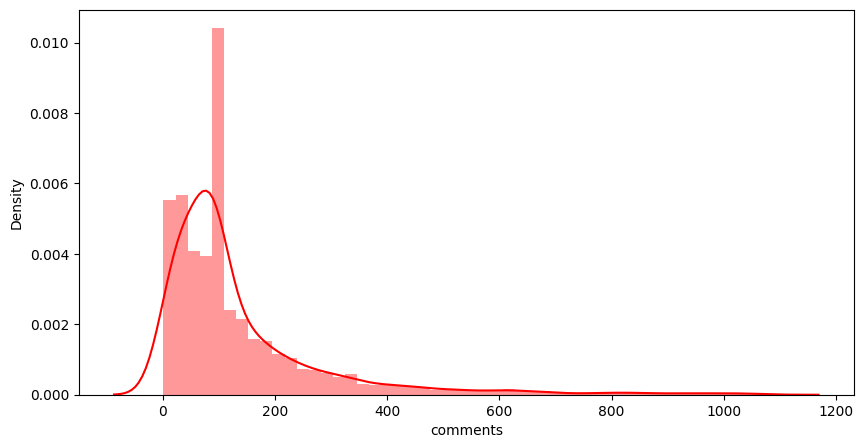

In [63]:
# checking distribution of comments column

plt.figure(figsize=(10,5))
sns.distplot(df['comments'], color='Red')

CHART-4

<Axes: xlabel='views', ylabel='Density'>

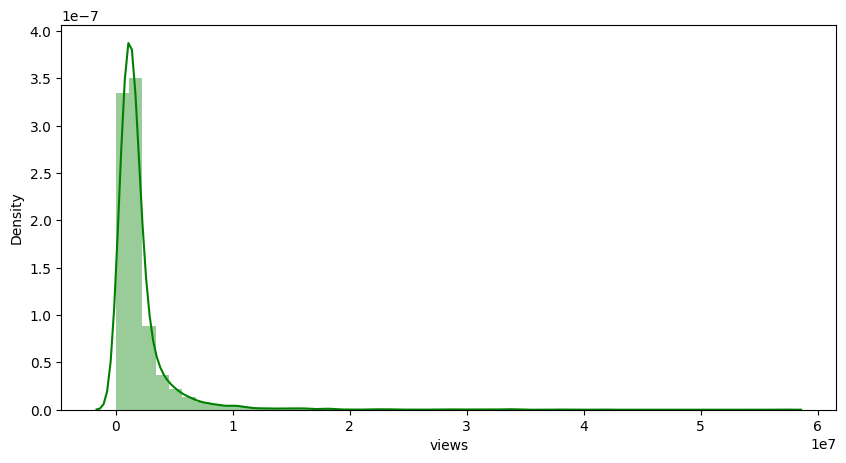

In [44]:
# Chart - 4 visualization code
# check distribution of views column

plt.figure(figsize=(10,5))
sns.distplot(df['views'], color ='green')


### Q&A Based on the Chart

1. **Why did you pick the specific chart?**  
   A density plot with a histogram was chosen to show the distribution of views for TED Talks. This visualization effectively highlights how viewership is concentrated and the range of outliers.

2. **What is/are the insight(s) found from the chart?**  
   - Most TED Talks receive a relatively low number of views, with the majority concentrated under 10 million.  
   - A long tail exists for videos with exceptionally high views, indicating a few highly successful talks dominate the overall viewership.

3. **Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with a specific reason.**  
   - **Positive Impact**: Insights can guide TED to analyze the common traits of highly viewed talks (e.g., topics, speakers) and replicate their success.  
   - **Negative Impact**: Over-reliance on creating content similar to highly viewed talks might reduce diversity and innovation in the topics covered.

CHART-5


<Axes: xlabel='duration', ylabel='Density'>

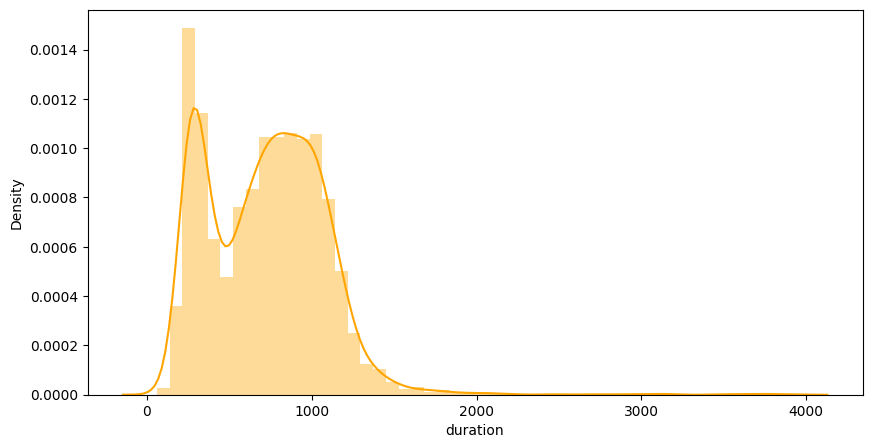

In [45]:
# Chart - 5 visualization code
# check distribution of duration column

plt.figure(figsize=(10,5))
sns.distplot(df['duration'], color ='Orange')

Why this chart?
Examining duration distribution ensures optimal video length for maximum engagement.

Insights:

TED Talks have varying durations, with a possible preference for mid-length videos.
Extreme durations may not be optimal for engagement.

Business Impact:

Positive: Tailoring video lengths based on audience preferences.
Negative: Over-standardizing lengths could limit creative freedom

In [64]:
# change duration in sec. to min.

df['duration'] = df['duration'] / 60

In [65]:
# Create a new column 'speaker_popularity' in the main DataFrame and assign the categories

df['speaker_popularity'] = ""
df.loc[df['views'] <= 500000, 'speaker_popularity'] = 'not_popular'
df.loc[(df['views'] > 500000) & (df['views'] <= 1500000), 'speaker_popularity'] = 'avg_popular'
df.loc[(df['views'] > 1500000) & (df['views'] <= 2500000), 'speaker_popularity'] = 'popular'
df.loc[(df['views'] > 2500000) & (df['views'] <= 3500000), 'speaker_popularity'] = 'high_popular'
df.loc[df['views'] > 3500000, 'speaker_popularity'] = 'extreme_popular'

# check the dataset

df.sample(2)

,title,speaker,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,speaker_popularity,video_rating,available_languages
2455,How I help free innocent people from prison,Ronald S Sullivan Jr.,891451,2016-10-21,2017-08-15,TEDxMidAtlantic,en,"['ar', 'cs', 'en', 'es', 'fr', 'he', 'it', 'ja...",23.0,0.198333,"['criminal justice', 'inequality', 'law', 'soc...",avg_popular,1,129
1943,A powerful poem about what it feels like to be...,Lee Mokobe,1499961,2015-05-28,2015-06-12,TEDWomen 2015,en,"['ar', 'bg', 'cs', 'da', 'de', 'el', 'en', 'es...",71.0,0.072500,"['Gender spectrum', 'TED Fellows', 'Transgende...",avg_popular,2,201


#### Chart - 6

<Axes: xlabel='speaker_popularity', ylabel='comments'>

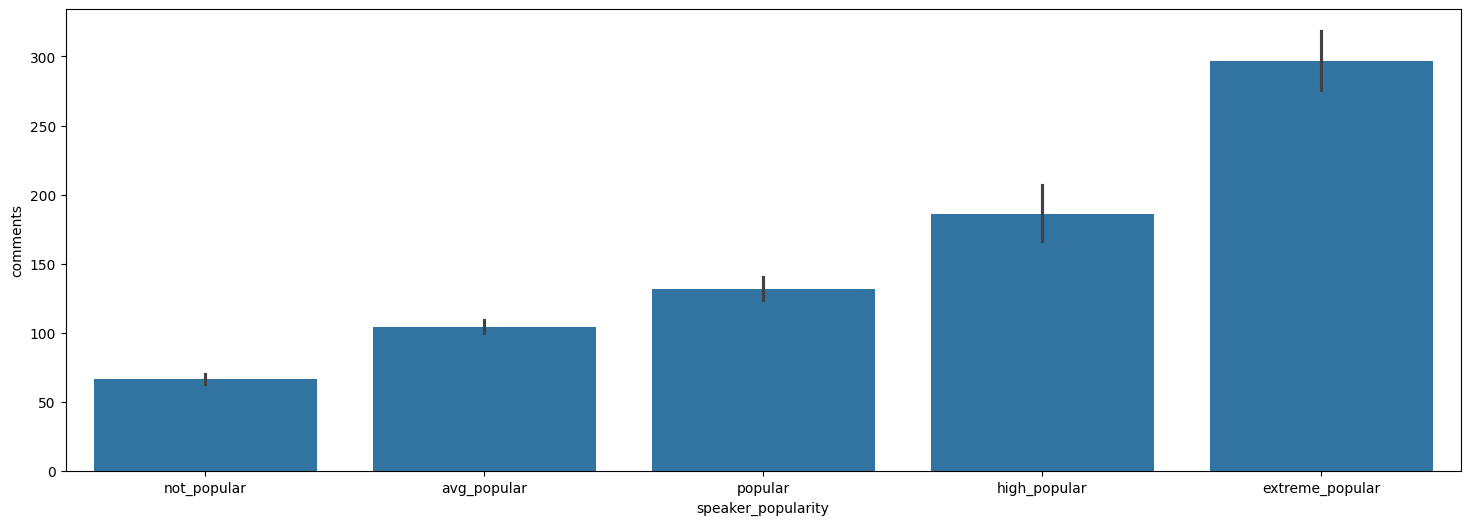

In [48]:
# Chart - 6 visualization code
plt.figure(figsize=(18,6))
sns.barplot(data=df, x='speaker_popularity', y='comments',
            order=['not_popular', 'avg_popular', 'popular', 'high_popular', 'extreme_popular'])

Why did you pick the specific chart?
A density plot with a histogram provides a clear visualization of the distribution of comments. It shows the frequency and concentration of comments for TED Talks, making it easy to observe where most talks lie on the spectrum of engagement.

What is/are the insight(s) found from the chart?

The majority of TED Talks receive fewer than 500 comments, with a sharp decline as the number of comments increases.
A long tail exists for talks with higher comment counts, indicating a few talks generate significantly more discussion than the rest.
Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with a specific reason.

Positive Impact: Identifying the characteristics of highly commented talks can help TED optimize future content for engagement.
Negative Impact: Overfocusing on the majority of low-comment talks might lead to missing opportunities to create more impactful and engaging content.


Answer Here

In [49]:
# Create a new column 'video_rating' in the main DataFrame and assign the categories

df['video_rating'] = ""
df.loc[df['comments'] <= 50, 'video_rating'] = 1
df.loc[(df['comments'] > 50) & (df['comments'] <= 120), 'video_rating'] = 2
df.loc[(df['comments'] > 120) & (df['comments'] <= 200), 'video_rating'] = 3
df.loc[(df['comments'] > 200) & (df['comments'] <= 300), 'video_rating'] = 4
df.loc[df['comments'] > 300, 'video_rating'] = 5

# check the dataset
df.sample(2)

,title,speaker,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,speaker_popularity,video_rating
389,How to restore a rainforest,Willie Smits,826252,2009-02-06,2009-03-03,TED2009,en,"['ar', 'bg', 'cs', 'de', 'en', 'es', 'fa', 'fr...",162.0,20.700000,"['animals', 'biodiversity', 'global issues', '...",avg_popular,3
3604,How the West can adapt to a rising Asia,Kishore Mahbubani,1815567,2019-04-15,2019-08-26,TED2019,en,"['ar', 'el', 'en', 'es', 'fr', 'gu', 'he', 'hu...",37.0,17.883333,"['global development', 'global issues', 'Asia'...",popular,1


In [50]:
# add new column available_languages using existing column available_lang

df['available_languages'] = df['available_lang'].apply(lambda x: len(x))
pd.DataFrame(df['available_languages'])

,available_languages
0,270
1,303
2,165
3,219
5,123
...,...
3999,27
4000,6
4001,27
4002,6


#### Chart - 7

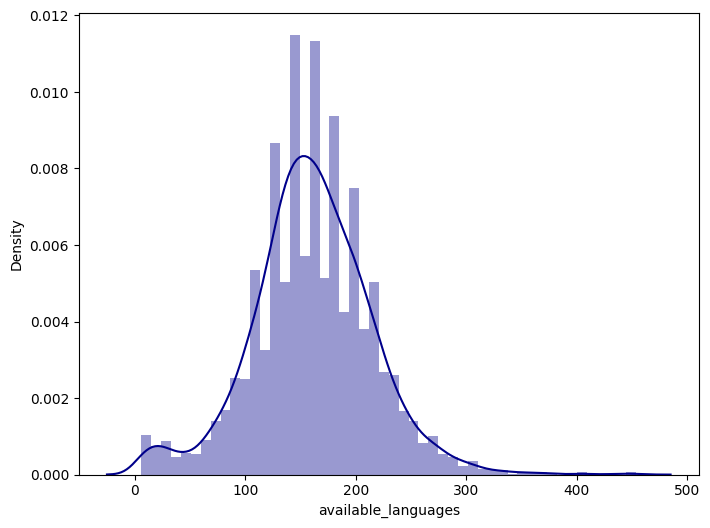

In [51]:
# Chart - 7 visualization code
# check the distribution of this new column available_languages

plt.figure(figsize=(8,6))
sns.distplot(df['available_languages'],color = 'darkblue')
plt.show()


Why did you pick the specific chart?
A density plot with a histogram was chosen to visualize the distribution of available languages for TED Talks because it effectively highlights the frequency and spread of data. This combination helps understand how multilingual accessibility is distributed across the dataset.

What is/are the insight(s) found from the chart?

The distribution of available languages is approximately normal, with most TED Talks offering translations in around 200 languages.
Few talks are available in fewer than 100 or more than 300 languages, showing a central focus on talks with translations in a moderate range.
The long tail suggests that only a small fraction of talks deviate significantly in either direction.
Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with a specific reason.

Positive Impact: Understanding the optimal range of available languages (around 200) can help TED prioritize resources for translation services to maximize accessibility.
Negative Impact: Overextending translation efforts for less popular talks might lead to wasted resources without significantly improving audience engagement.


#### Chart - 8 - Correlation Heatmap

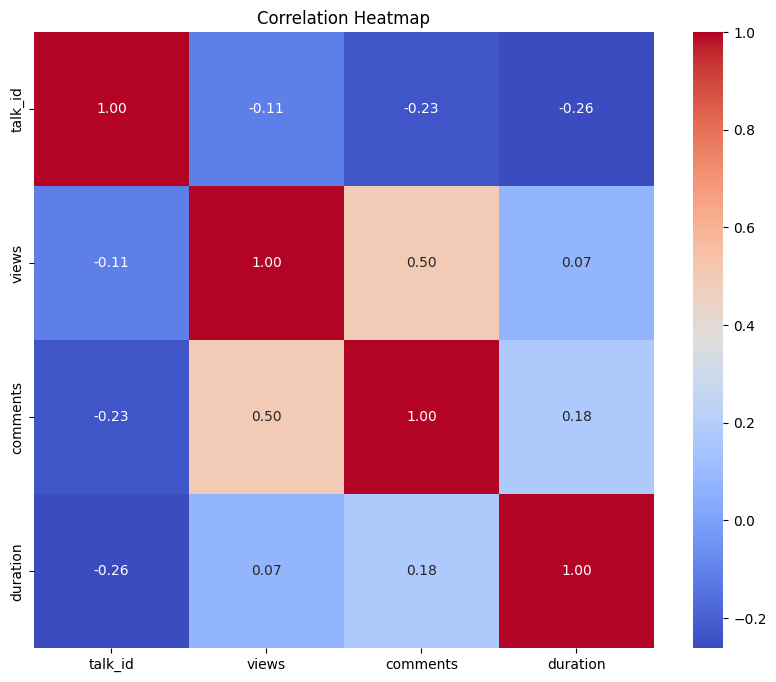

In [67]:
# Correlation Heatmap visualization code
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation calculation
numeric_columns = d.select_dtypes(include=['number'])

correlation_matrix = numeric_columns.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

# Add title and display the heatmap
plt.title("Correlation Heatmap")
plt.show()

Why did you pick the specific chart?

A correlation heatmap is a powerful visualization to understand the relationships between numerical variables in a dataset. It provides an easy-to-read summary of how strongly features are correlated with each other, aiding in feature selection and understanding dependencies.

What is/are the insight(s) found from the chart?

Positive Correlation: There is a moderate positive correlation of 0.50 between views and comments, suggesting that talks with higher views tend to have more comments.

Negative Correlation: There is a weak negative correlation between duration and talk_id (-0.26), indicating minimal dependency between the two variables.
Low Correlation: Features like duration and views (0.07) have almost no correlation, which means they are largely independent of each other.

Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with a specific reason.

Positive Impact: The moderate positive correlation between views and comments suggests that engaging and widely viewed talks tend to spark more conversations. By focusing on promoting content that encourages interaction, TED can optimize user engagement.

Negative Impact: Misinterpreting weak correlations (e.g., duration and views) could lead to ineffective efforts in designing talks based on length, which may not drive significant growth. It's essential to rely on strong correlations when making strategic decisions.

#### Chart - 9 - Pair Plot

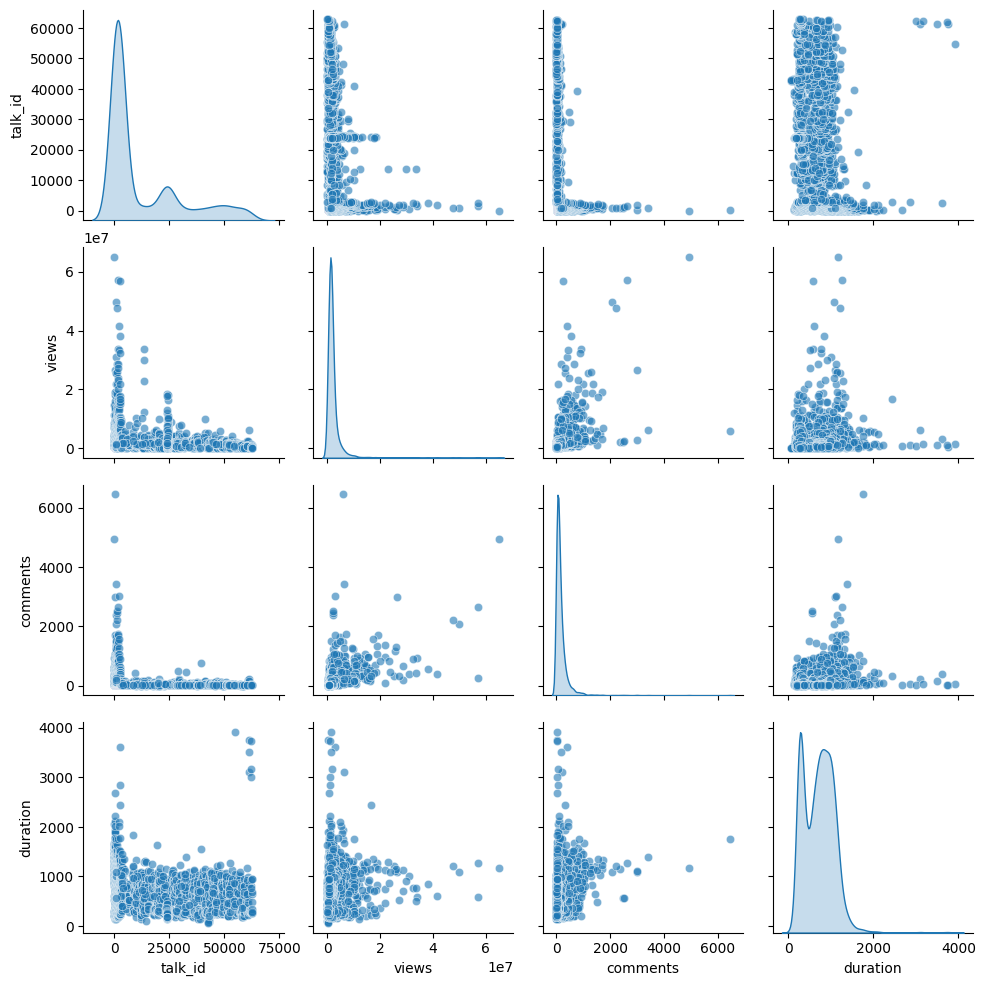

In [68]:
# Pair Plot visualization code
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt




# Create the pair plot
sns.pairplot(d, diag_kind="kde", plot_kws={"alpha": 0.6})

# Display the plot
plt.show()


### Why did you pick the specific chart?  
The pair plot effectively visualizes pairwise relationships and distributions across numerical features, making it easy to detect correlations, trends, and outliers in the dataset.

### What is/are the insight(s) found from the chart?  
1. `talk_id` has no meaningful relationship with other features as it's an identifier.  
2. A positive relationship exists between `views` and `comments`; talks with higher views tend to receive more comments.  
3. Longer durations cluster around moderate views and comments but show no strong correlation.  
4. Distributions of `views` and `comments` are highly skewed, with significant outliers.

### Will the gained insights help create a positive business impact?  
**Positive Impact**:  
1. Insights on `views` and `comments` can help TED optimize content for engagement.  
2. Understanding `duration` trends enables tailoring talk lengths for better audience retention.  
**Negative Impact**:  
1. Overemphasis on popular talks might ignore niche audiences.  
2. Unhandled outliers could bias future content strategies.  

**FEATURE ENGINEERING**

In [69]:
# Making seperate column for day, month and year of upload

df['published_year'] = df['published_date'].dt.year
df['published_month'] = df['published_date'].dt.month
df['published_day'] = df["published_date"].dt.day_name()

# storing weekdays in order of numbers from 0 to 6 value

daydict = {'Sunday' : 0, 'Monday' : 1, 'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6}

# making new column holding information of day number

df['published_daynumber'] = df['published_day'].map(daydict)


In [70]:
# add one more column published_months_ago

df['published_months_ago'] = ((2023 - df['published_year'])*12 + df['published_month'])


In [71]:
df.sample(1)

,title,speaker,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,speaker_popularity,video_rating,available_languages,published_year,published_month,published_day,published_daynumber,published_months_ago
3380,How to spot a pyramid scheme,Stacie Bosley,2186212,2019-04-02,2019-04-02,TED-Ed,en,"['ar', 'de', 'en', 'es', 'fr', 'he', 'id', 'ja...",88.0,0.080278,"['TED-Ed', 'economics', 'animation', 'business...",popular,2,135,2019,4,Tuesday,2,52


In [72]:
# there are lot of TED events

print(df['event'].value_counts().head(10))

event
TED-Ed            555
TED2018            96
TED2017            96
TED2019            91
TED2014            83
TED2009            80
TED2016            75
TED2015            74
TED2013            72
TEDGlobal 2012     69
Name: count, dtype: int64


In [73]:
# add new column of each TED event type using existing column event

ted_categories = ['TED-Ed','TEDx', 'TED', 'TEDGlobal', 'TEDSummit', 'TEDWomen', 'TED Residency']


df['TEDevent_type'] = df['event'].map(lambda x: "TEDx" if x[0:4] == "TEDx" else x)
df['TEDevent_type'] = df['TEDevent_type'].map(lambda x: "TED-Ed" if x[0:4] == "TED_Ed" else x)
df['TEDevent_type'] = df['TEDevent_type'].map(lambda x: "TED" if x[0:4] == "TED2" else x)
df['TEDevent_type'] = df['TEDevent_type'].map(lambda x: "TEDGlobal" if x[0:4] == "TEDG" else x)
df['TEDevent_type'] = df['TEDevent_type'].map(lambda x: "TEDWomen" if x[0:4] == "TEDW" else x)
df['TEDevent_type'] = df['TEDevent_type'].map(lambda x: "TEDSummit" if x[0:4] == "TEDS" else x)
df['TEDevent_type'] = df['TEDevent_type'].map(lambda x: "TED Residency" if x[0:13] == "TED Residency" else x)
df['TEDevent_type'] = df['TEDevent_type'].map(lambda x: "Other TED" if x not in ted_categories else x)

In [74]:

# check the all events talkshows counts

pd.DataFrame(df['TEDevent_type'].value_counts()).reset_index()

,TEDevent_type,count
0,TED,1160
1,TEDx,689
2,Other TED,677
3,TED-Ed,555
4,TEDGlobal,510
5,TEDWomen,194
6,TEDSummit,145
7,TED Residency,40


In [75]:
import ast

# use duplicate dataframe for topics analysis
dff = df.copy()

dff['topics'] = dff['topics'].apply(lambda x: ast.literal_eval(x))
s = dff.apply(lambda x: pd.Series(x['topics']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'topic'

dff = dff.drop('topics', axis=1).join(s)

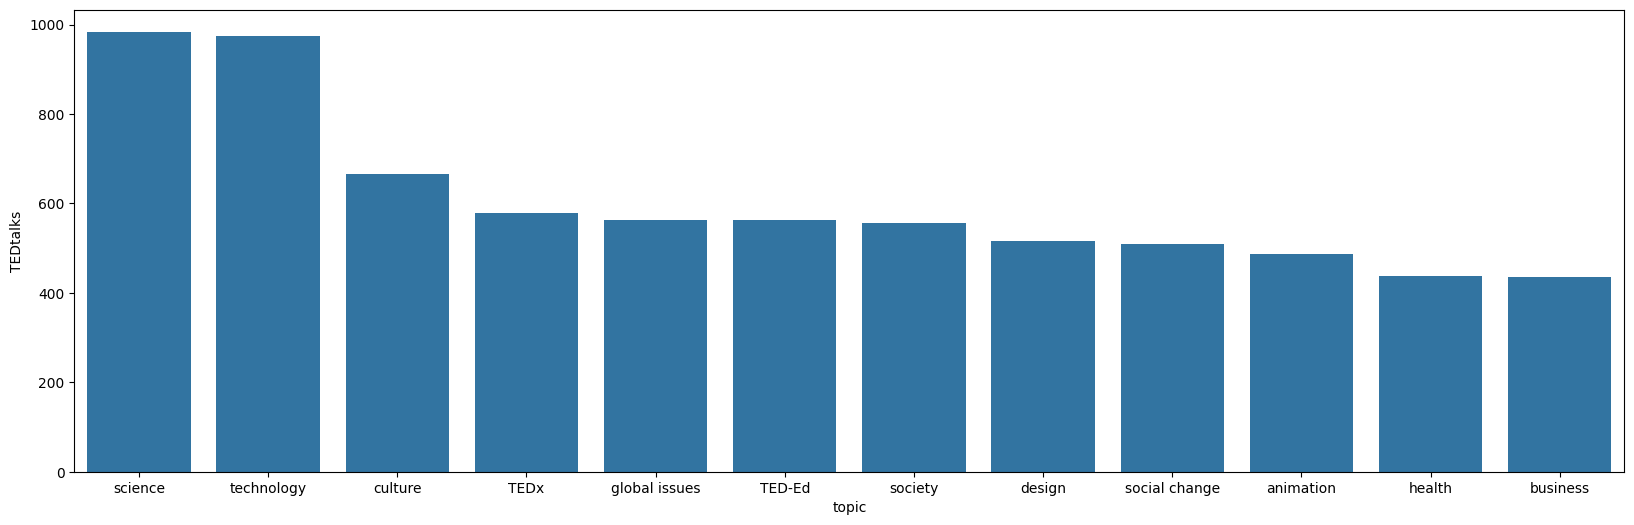

In [76]:
# plot a bar chart of popular topics of TEDx Website

pop_topic = pd.DataFrame(dff['topic'].value_counts()).reset_index()
pop_topic.columns = ['topic', 'TEDtalks']

plt.figure(figsize=(20,6))
sns.barplot(x='topic', y='TEDtalks', data=pop_topic.head(12))
plt.show()


### Feature Manipulation & Selection

In [77]:
df.drop(labels = ["speaker", "title", "recorded_date", "published_date", "event", "native_lang", "available_lang", "topics"],axis = 1, inplace = True)


In [78]:
# again change data-types of columns

df = df.astype({'comments':'int64', 'views':'int64','video_rating':'int64'})

df = df.astype({
    'speaker_popularity': 'category',
    'published_day': 'category',
    'TEDevent_type': 'category'
})

# Multicollinearity

In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# create a new DataFrame with only numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'int32', 'float32', 'float64']).drop(['views'], axis=1)

# calculate VIF for each column
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(numeric_cols.values, i) for i in range(numeric_cols.shape[1])]
vif["features"] = numeric_cols.columns

# print the results
vif

,VIF Factor,features
0,3.971720,comments
1,1.420999,duration
2,4.400025,video_rating
3,1.978647,available_languages
4,25.951809,published_year
5,4.419445,published_month
6,1.025045,published_daynumber
7,11.396764,published_months_ago


The columns published_year and published_months_ago are highly correlated with each other and have high VIF. We can remove one of these columns and check VIF again.

In [80]:
# Step 1: drop published_months_ago column

df.drop(['published_year','published_month', 'published_months_ago','video_rating'], axis=1, inplace=True)


# Step 2: calculate VIF

numeric_cols = df.select_dtypes(include=['int64', 'int32', 'float32', 'float64']).drop(['views'], axis=1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(numeric_cols.values, i) for i in range(numeric_cols.shape[1])]
vif["features"] = numeric_cols.columns


# print the results

vif


,VIF Factor,features
0,2.385945,comments
1,3.516331,duration
2,6.619888,available_languages
3,4.347393,published_daynumber


In [81]:
# use Yeo - Johnson Transform for views column and then we train test split the data

pt = PowerTransformer()
df['views'] = pt.fit_transform(pd.DataFrame(df['views']))

## ***7. ML Model Implementation***

### ML Model - 1

In [82]:
# ML Model - 1 Implementation
# split the Dataset into independent(x) and dependent(y) Dataset

X = df.drop(columns=['views'])
y = df['views']


In [83]:
# display independent variables dataframe

X

,comments,duration,speaker_popularity,available_languages,published_day,published_daynumber,TEDevent_type
0,272,0.271389,extreme_popular,270,Tuesday,2,TED
1,628,0.330556,extreme_popular,303,Tuesday,2,TED
2,124,0.357222,popular,165,Tuesday,2,TED
3,219,0.310000,high_popular,219,Tuesday,2,TED
5,48,0.332778,avg_popular,123,Monday,1,TED
...,...,...,...,...,...,...,...
3999,37,0.261389,avg_popular,27,Friday,5,TED
4000,6,0.191667,avg_popular,6,Monday,1,TED
4001,88,0.096111,not_popular,27,Monday,1,TED-Ed
4002,9,0.215000,not_popular,6,Tuesday,2,TEDx


In [84]:
# display dependent variable dataframe

y

,views
0,1.061682
1,2.903487
2,0.352765
3,0.729321
5,-0.159127
...,...
3999,-0.644983
4000,-1.060495
4001,-1.531922
4002,-1.138371


In [85]:
from sklearn.model_selection import train_test_split

In [86]:
# calling train_test_split() to get the training and testing data.

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# split sizes
print(X_train.shape)
print(X_test.shape)


(3176, 7)
(794, 7)


In [87]:
# using column transformer to make step1 of scaling, encoding, function transformer, imputer etc to build pipelines.
step1 = ColumnTransformer(transformers=[
    ('col_tnf', StandardScaler(),[0,1,3,5]),
    ('col_tnf1', PowerTransformer(),[0,1,3]),
    ('col_tnf2', OneHotEncoder(sparse_output=False, drop='first'),[4,6]), # Change 'sparse' to 'sparse_output'
    ('col_tnf3', OrdinalEncoder(categories=[['not_popular','avg_popular','popular','high_popular','extreme_popular']]),[2])
],remainder='passthrough')



# display pipeline

from sklearn import set_config
set_config(display='diagram')

By utilizing a ColumnTransformer, we can efficiently apply multiple pre-processing steps, such as scaling, encoding and function transformation, to our data in a single step. This simplifies the pre-processing phase and allows us to build pipelines with different algorithms, performing hyperparameter tuning to find the best results for our model.

In [88]:
# apply LinearRegression algorithm as step2

step2 = LinearRegression()


# make pipeline
pipe1 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

# fit the pipeline on training dataset
pipe1.fit(X_train,y_train)

# predict the train and test dataset
y_pred_train = pipe1.predict(X_train)
y_pred = pipe1.predict(X_test)

# display pipeline diagram
display(pipe1)
# LinearRegression model all output scores
print('\033[1mTraining data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_train,y_pred_train))
print('Adjusted R2 score', (1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))))

print('\n')
print('\033[1mTesting data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_test,y_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

print('\n')
print('\033[1mThe performance metrics\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf', StandardScaler(),
                                                  [0, 1, 3, 5]),
                                                 ('col_tnf1',
                                                  PowerTransformer(),
                                                  [0, 1, 3]),
                                                 ('col_tnf2',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [4, 6]),
                                                 ('col_tnf3',
                                                  OrdinalEncoder(categories=[['not_popular',
                                                                              'avg_popular',
                                                                              'popular',
                                                                              'high_popular',
                                                                              'extreme_popular']]),
                                                  [2])])),
                ('step2', LinearRegression())])

Training data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.8413797930396109
Adjusted R2 score 0.8410293064712009


Testing data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.8267148112088416
Adjusted R2 score 0.8251715588913631


The performance metrics
-----------------------------------------
MAE 0.2959243207696009
MSE 0.17207255487289144
RMSE 0.4148162905104999


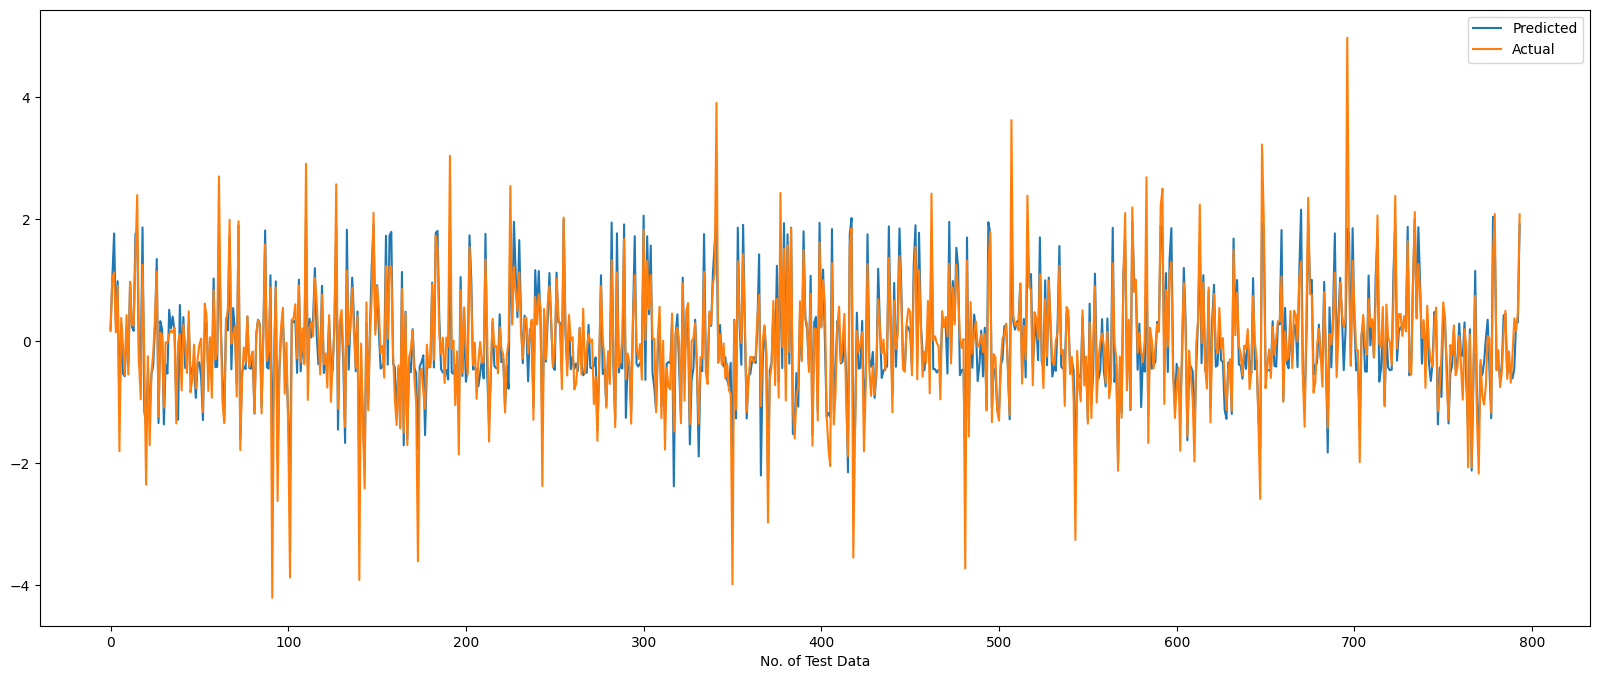

In [89]:

# Plot the figure
plt.figure(figsize=(20,8))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No. of Test Data')
plt.show()


### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [90]:
# Visualizing evaluation Metric Score chart
# apply RidgeRegression algorithm with hyperparameter tuning as step2


# giving parameters
parameters = {'alpha': [1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,3,5,8,12,15,18,21,25]}

# we use gridsearchCV because the dataset is not that big so we use this not RandomizedSearchCV
Reg_ridge = GridSearchCV(Ridge(), parameters, cv=10)

step2 = Reg_ridge

# make pipeline
pipe2 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

# fit the pipeline on training dataset
pipe2.fit(X_train,y_train)

# predict the train and test dataset
y_pred_train = pipe2.predict(X_train)
y_pred = pipe2.predict(X_test)

# display pipeline diagram
display(pipe2)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf', StandardScaler(),
                                                  [0, 1, 3, 5]),
                                                 ('col_tnf1',
                                                  PowerTransformer(),
                                                  [0, 1, 3]),
                                                 ('col_tnf2',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [4, 6]),
                                                 ('col_tnf3',
                                                  OrdinalEncoder(categories=[['not_popular',
                                                                              'avg_popular',
                                                                              'popular',
                                                                              'high_popular',
                                                                              'extreme_popular']]),
                                                  [2])])),
                ('step2',
                 GridSearchCV(cv=10, estimator=Ridge(),
                              param_grid={'alpha': [1e-08, 1e-07, 1e-06, 1e-05,
                                                    0.0001, 0.001, 0.01, 0.1, 1,
                                                    3, 5, 8, 12, 15, 18, 21,
                                                    25]}))])

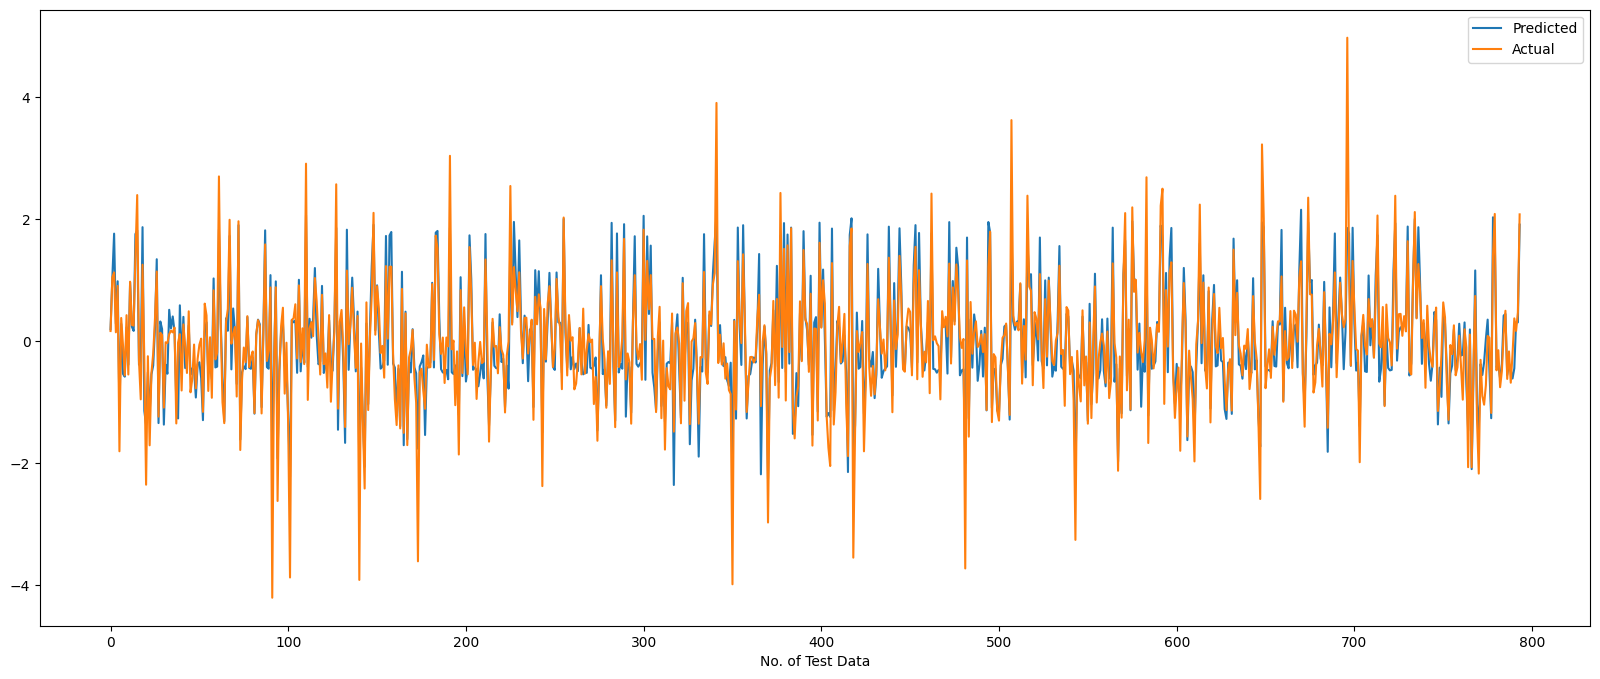

In [91]:

# Plot the figure
plt.figure(figsize=(20,8))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No. of Test Data')
plt.show()

### ML Model - 3

In [92]:
# ML Model - 3 Implementation

# apply LassoRegression algorithm with hyperparameter tuning as step2


# giving parameters
parameters = {'alpha': [1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,2,3,4,5,8,12,15,18,21,25]}

# we use gridsearchCV because the dataset is not that big so we use this not RandomizedSearchCV
Reg_Lasso = GridSearchCV(Lasso(), parameters, cv=10)

step2 = Reg_Lasso

# make pipeline
pipe3 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

# fit the pipeline on training dataset
pipe3.fit(X_train,y_train)

# predict the train and test dataset
y_pred_train = pipe3.predict(X_train)
y_pred = pipe3.predict(X_test)

# display pipeline diagram
display(pipe3)

# Lasso Regression model all output scores
print('\033[1mTraining data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_train,y_pred_train))
print('Adjusted R2 score', (1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))))

print('\n')
print('\033[1mTesting data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_test,y_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

print('\n')
print('\033[1mCross-validation score and best params\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print("The best parameters is", Reg_Lasso.best_params_)
print('cross-validation score', Reg_Lasso.best_score_)

print('\n')
print('\033[1mThe performance metrics\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf', StandardScaler(),
                                                  [0, 1, 3, 5]),
                                                 ('col_tnf1',
                                                  PowerTransformer(),
                                                  [0, 1, 3]),
                                                 ('col_tnf2',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [4, 6]),
                                                 ('col_tnf3',
                                                  OrdinalEncoder(categories=[['not_popular',
                                                                              'avg_popular',
                                                                              'popular',
                                                                              'high_popular',
                                                                              'extreme_popular']]),
                                                  [2])])),
                ('step2',
                 GridSearchCV(cv=10, estimator=Lasso(),
                              param_grid={'alpha': [1e-08, 1e-07, 1e-06, 1e-05,
                                                    0.0001, 0.001, 0.01, 0.1, 1,
                                                    2, 3, 4, 5, 8, 12, 15, 18,
                                                    21, 25]}))])

Training data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.8347786753567612
Adjusted R2 score 0.8344136029853904


Testing data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.8197150390762027
Adjusted R2 score 0.8181094478211561


Cross-validation score and best params
-----------------------------------------
The best parameters is {'alpha': 1e-08}
cross-validation score 0.8327496750071223


The performance metrics
-----------------------------------------
MAE 0.29884739411992145
MSE 0.1790233432397084
RMSE 0.42311150213591264


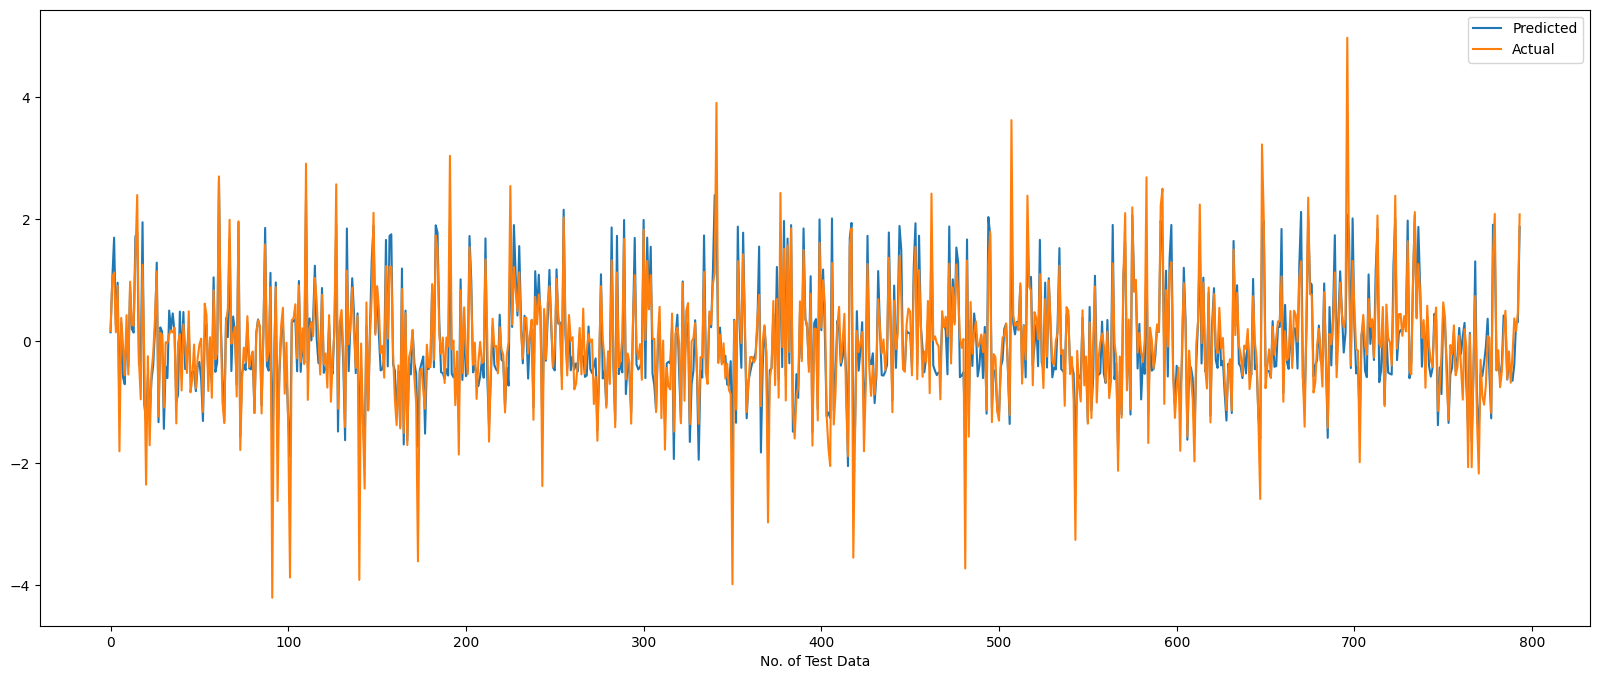

In [93]:

# Plot the figure
plt.figure(figsize=(20,8))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No. of Test Data')
plt.show()

# ML Model - 4

In [94]:
# apply DecisionTreeRegressor algorithm with hyperparameter tuning as step2


# giving parameters
parameters = {
    'criterion':['squared_error'],     # 'friedman_mse', 'absolute_error'
    'splitter' :['best'],              # random
    'max_depth' :[6],                  #4,5,6,7,8,9,None
    'max_features' :[1.0]              #0.25,0.50,0.75,0.85
}

# we use gridsearchCV because the dataset is not that big so we use this not RandomizedSearchCV
dtr = GridSearchCV(DecisionTreeRegressor(), param_grid=parameters , cv=10, n_jobs=-1)

step2 = dtr

# make pipeline
pipe4 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

# fit the pipeline on training dataset
pipe4.fit(X_train,y_train)
# predict the train and test dataset
y_pred_train = pipe4.predict(X_train)
y_pred = pipe4.predict(X_test)

# display pipeline diagram
display(pipe4)

# DecisionTreeRegressor model all output scores
print('\033[1mTraining data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_train,y_pred_train))
print('Adjusted R2 score', (1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))))

print('\n')
print('\033[1mTesting data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_test,y_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))
print('\n')
print('\033[1mCross-validation score and best params\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print("The best parameters is", dtr.best_params_)
print('cross-validation score', dtr.best_score_)

print('\n')
print('\033[1mThe performance metrics\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf', StandardScaler(),
                                                  [0, 1, 3, 5]),
                                                 ('col_tnf1',
                                                  PowerTransformer(),
                                                  [0, 1, 3]),
                                                 ('col_tnf2',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [4, 6]),
                                                 ('col_tnf3',
                                                  OrdinalEncoder(categories=[['not_popular',
                                                                              'avg_popular',
                                                                              'popular',
                                                                              'high_popular',
                                                                              'extreme_popular']]),
                                                  [2])])),
                ('step2',
                 GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
                              n_jobs=-1,
                              param_grid={'criterion': ['squared_error'],
                                          'max_depth': [6],
                                          'max_features': [1.0],
                                          'splitter': ['best']}))])

Training data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.9012531539212881
Adjusted R2 score 0.9010349632891698


Testing data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.8585126902173086
Adjusted R2 score 0.8572526251174627


Cross-validation score and best params
-----------------------------------------
The best parameters is {'criterion': 'squared_error', 'max_depth': 6, 'max_features': 1.0, 'splitter': 'best'}
cross-validation score 0.8688544196137118


The performance metrics
-----------------------------------------
MAE 0.2573475034185148
MSE 0.14049719451638545
RMSE 0.37482955395270723


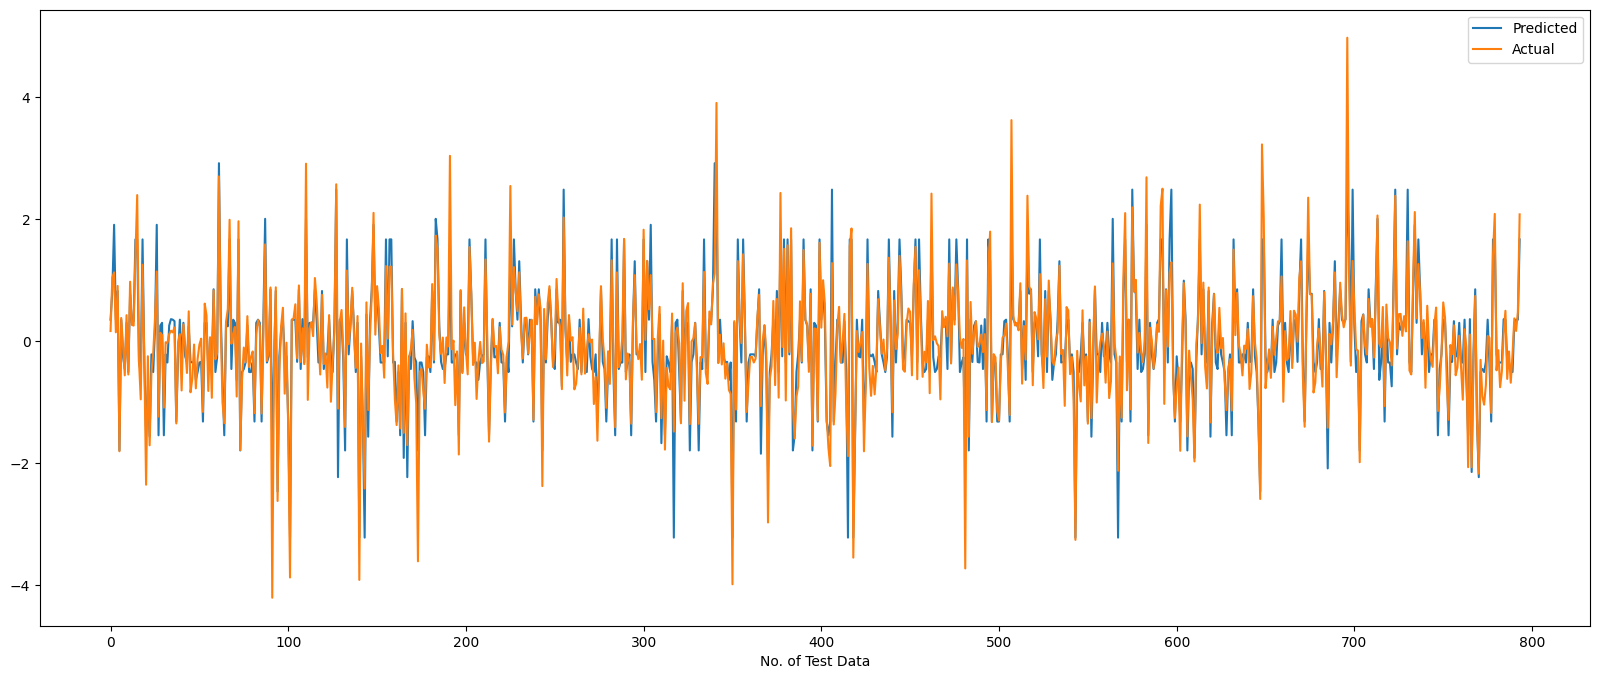

In [95]:

# Plot the figure
plt.figure(figsize=(20,8))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No. of Test Data')
plt.show()


# ML Model - 5

In [96]:
# apply RandomForestRegressor algorithm with hyperparameter tuning as step2


# giving parameters
parameters = {
    'n_estimators':[58],      # 50,55,60,70,80,90,100
    'max_depth' :[6],         # 4,5,6,7,8,9,None
    'max_features' :[None],   # 'sqrt','log2'
    'max_samples' :[0.85]     # 0.40,0.50,0.60,0.70,0.75,0.85,1.0
}

# we use gridsearchCV because the dataset is not that big so we use this not RandomizedSearchCV
rfr = GridSearchCV(RandomForestRegressor(), param_grid=parameters , cv=10, n_jobs=-1)

step2 = rfr

# make pipeline
pipe5 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])
# fit the pipeline on training dataset
pipe5.fit(X_train,y_train)

# predict the train and test dataset
y_pred_train = pipe5.predict(X_train)
y_pred = pipe5.predict(X_test)

# display pipeline diagram
display(pipe5)

# RandomForestRegressor model all output scores
print('\033[1mTraining data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_train,y_pred_train))
print('Adjusted R2 score', (1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))))

print('\n')
print('\033[1mTesting data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_test,y_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

print('\n')
print('\033[1mCross-validation score and best params\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print("The best parameters is", rfr.best_params_)
print('cross-validation score', rfr.best_score_)
print('\n')
print('\033[1mThe performance metrics\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf', StandardScaler(),
                                                  [0, 1, 3, 5]),
                                                 ('col_tnf1',
                                                  PowerTransformer(),
                                                  [0, 1, 3]),
                                                 ('col_tnf2',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [4, 6]),
                                                 ('col_tnf3',
                                                  OrdinalEncoder(categories=[['not_popular',
                                                                              'avg_popular',
                                                                              'popular',
                                                                              'high_popular',
                                                                              'extreme_popular']]),
                                                  [2])])),
                ('step2',
                 GridSearchCV(cv=10, estimator=RandomForestRegressor(),
                              n_jobs=-1,
                              param_grid={'max_depth': [6],
                                          'max_features': [None],
                                          'max_samples': [0.85],
                                          'n_estimators': [58]}))])

Training data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.9108026703447568
Adjusted R2 score 0.9106055802855438


Testing data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.8697702376622101
Adjusted R2 score 0.8686104306184893


Cross-validation score and best params
-----------------------------------------
The best parameters is {'max_depth': 6, 'max_features': None, 'max_samples': 0.85, 'n_estimators': 58}
cross-validation score 0.8827558942720811


The performance metrics
-----------------------------------------
MAE 0.253094717675541
MSE 0.12931842635991267
RMSE 0.3596087128531686


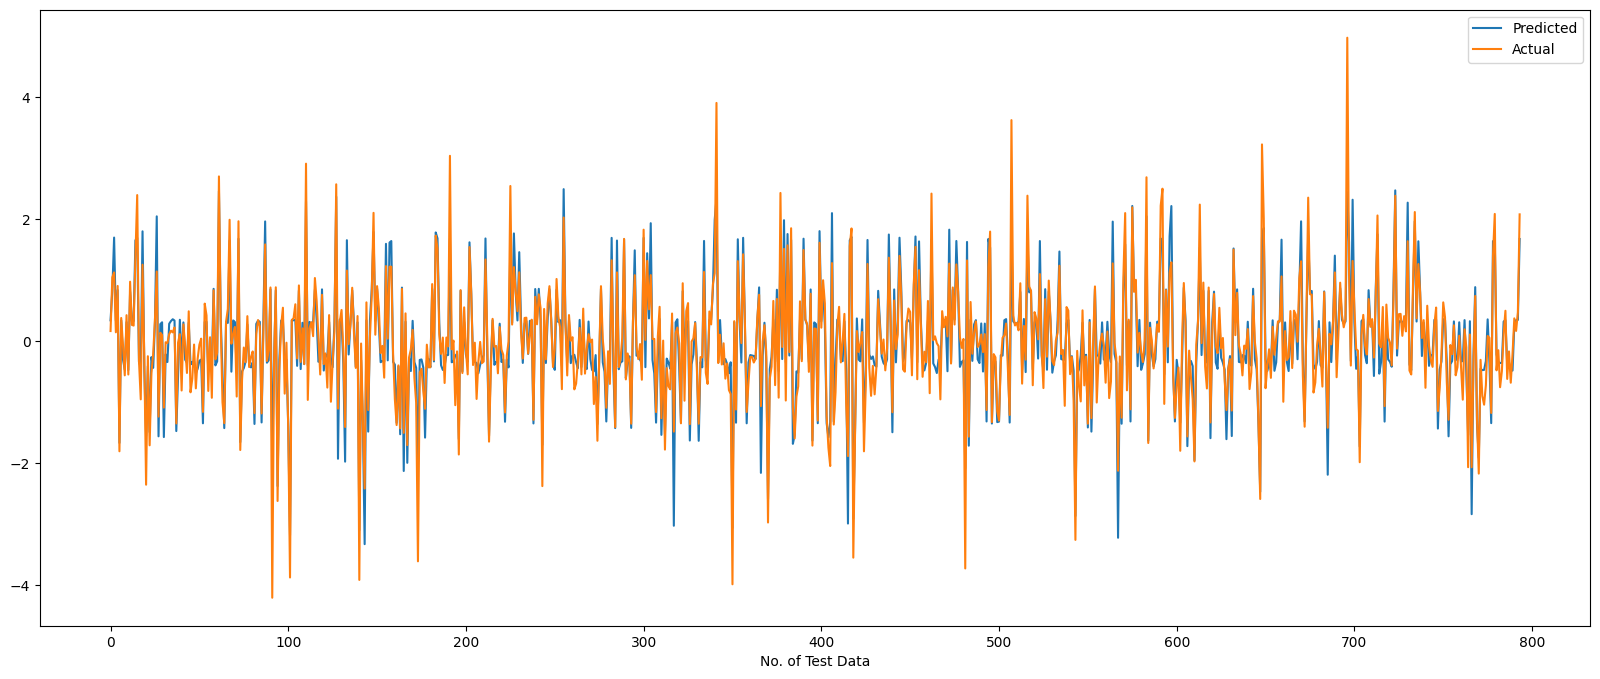

In [97]:

# Plot the figure
plt.figure(figsize=(20,8))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No. of Test Data')
plt.show()

# **Conclusion**

After evaluating multiple regression models on the dataset, Random Forest Regressor perform better than other models. They have higher R2 scores, lower error metrics, and can generalize well on unseen data.

Linear Regressor and Lasso Regressor have slightly lower performance metrics compared to Random Forest Regressor and Gradient Boosting Regressor.

Decision Tree Regressor has a lower R2 score, higher error metrics, and little bit overfits the data comparing to the other best models, indicating it's not the best model to use.
Therefore, based on the evaluation results, the Random Forest Regressor was chosen as the best model to achieve our objective. Also in future we can try implementing some other optimising techniques to wind up with better results.

🥇RandomForest with hyperparameter tuning🥇
Training data R2 and Adjusted R2 Score

R2 score 0.9108
Adjusted R2 score 0.9106
Testing data R2 and Adjusted R2 Score

R2 score 0.8977
Adjusted R2 score 0.

Cross-validation score
0.8974

The performance metrics

MAE 0.2613

MSE 0.1055

RMSE 0.3249

At the end a word of Thankyou to you for going through project till the very end, genuinely appreciate your time. Happy Learning!

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***